In [1]:
from collections import defaultdict

import utility
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import statistics 

In [2]:
input = {
    20: 'synthetic20generator_uniform_prior_uniform-time.csv',
    30: 'synthetic30generator_uniform_prior_uniform-time.csv',
    40: 'synthetic40generator_uniform_prior_uniform-time.csv',
    60: 'synthetic60generator_uniform_prior_uniform-time.csv',
    80: 'synthetic80generator_uniform_prior_uniform-time.csv'
}

numerosities = [20, 30, 40, 60, 80]
numerosities_without_filters = [20, 30]
numerosities_with_filters = [20, 30, 40, 60, 80]

# Functions below try to retrieve the informations which they need using regex on input_file. If they failed
# than variabile will be initialized with value in except part
try:
    family = utility.get_family_name(input_file)
except:
    family = 'synthetic'
    
try:
    generator_prior = get_generator_prior(input_file)
except:
    generator_prior = 'generator_uniform_prior_uniform'
    
  
filters, recommenders, vois, time = utility.read_input_files(input)
filters_without_all = filters.copy()
filters_without_all.remove(" All")


voiName = utility.get_voi_name()
filterName = utility.get_filter_name()
recName = utility.get_rec_name()

voiStyle = utility.get_voi_style()
filterStyle = utility.get_filter_style()
recStyle = utility.get_rec_style()

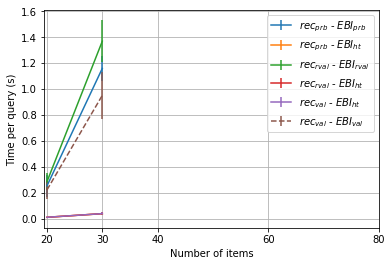

In [3]:
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
filt=' All'
for recom in recommenders:
    for voi in vois:
        there_is_combination_of_filt_recom_voi = False
        x_vals = []
        y_vals = []
        y_err = []
        for num in numerosities_without_filters:
            table = time[num]
            row = table[ (table['recommender'] == recom) & (table['filter'] == filt) & (table['selector'] == voi)]
        
            if not row.empty:
                there_is_combination_of_filt_recom_voi = True
                x_vals.append(num)
                y_vals.append(row.iloc[0].average_time)
                y_err.append(row.iloc[0].stddev_time)
            
        if there_is_combination_of_filt_recom_voi:
            ax.errorbar(x_vals, y_vals,  yerr=y_err, label=recName[recom.strip()] + " - " + voiName[voi.strip()], linestyle=voiStyle[voi.strip()])        
ax.set(xlabel='Number of items', xticks=list(numerosities), ylabel='Time per query (s)')

ax.grid()
ax.legend()
plt.show()

# Title of the Fig. 
title = "time_recommender-selector-filter-All.pdf"
fig.savefig(title, pad_inches=0, bbox_inches='tight')


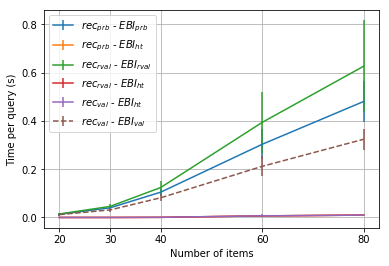

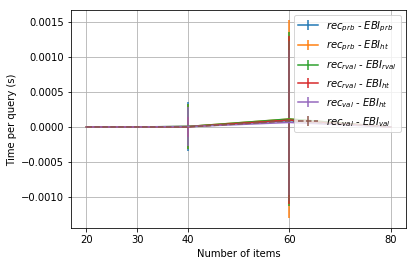

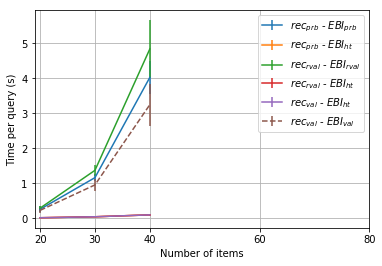

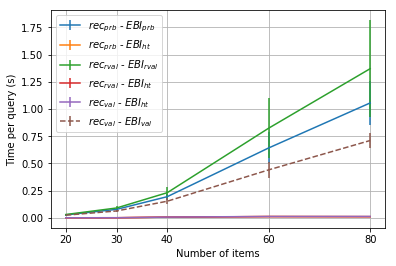

In [4]:
#for filt in filters_without_all:
for filt in filters:
    fig = plt.figure(figsize=(6,4))
    ax = fig.subplots()
    for recom in recommenders:
        for voi in vois:
            there_is_combination_of_filt_recom_voi = False
            x_vals = []
            y_vals = []
            y_err = []

            for num in numerosities_with_filters:
                table = time[num]
                row = table[ (table['recommender'] == recom) & (table['filter'] == filt) & (table['selector'] == voi)]

                if not row.empty:
                    there_is_combination_of_filt_recom_voi = True
                    x_vals.append(num)
                    y_vals.append(row.iloc[0].average_time)
                    y_err.append(row.iloc[0].stddev_time)
                    
            if there_is_combination_of_filt_recom_voi:
                ax.errorbar(x_vals, y_vals,  yerr=y_err, label=recName[recom.strip()] + " - " + voiName[voi.strip()], linestyle=voiStyle[voi.strip()])        
    ax.set(xlabel='Number of items', xticks=list(numerosities), ylabel='Time per query (s)')

    ax.grid()
    ax.legend()
    plt.show()
    # Title of the Fig. 
    #title = "time-fig-selector-time"+ "_" + filt +"-"+ recom + ".pdf"
    title = "time_recommender-selector-"+filt+".pdf"
    fig.savefig(title, pad_inches=0, bbox_inches='tight')

 Prbr  Prbs  TWA


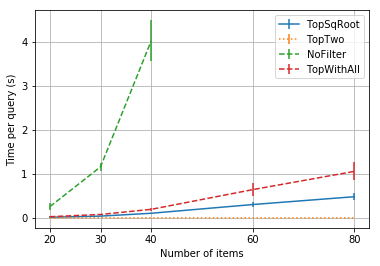

 Prbr  TTEs  TWA


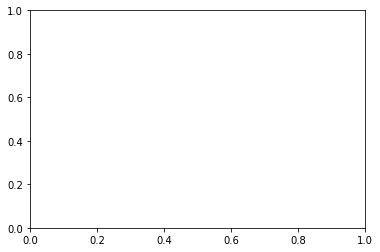

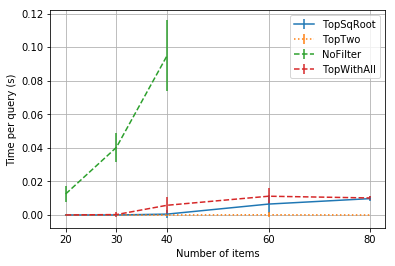

 ReVr  ReVs  TWA


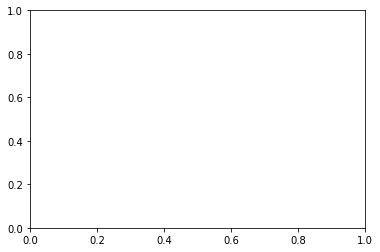

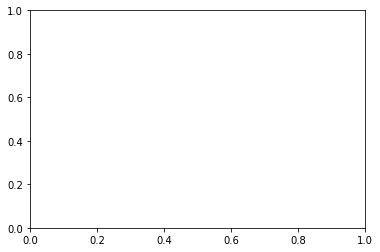

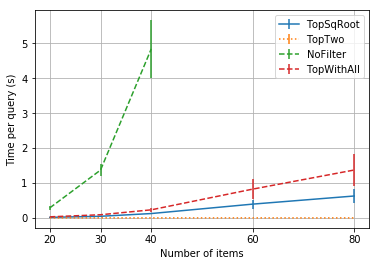

 ReVr  TTEs  TWA


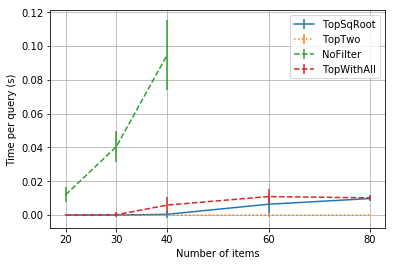

 Valr  TTEs  TWA


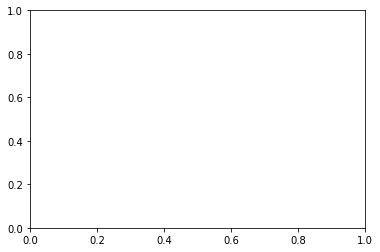

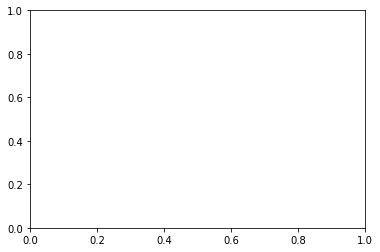

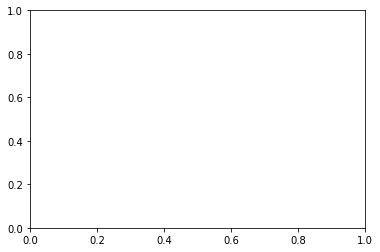

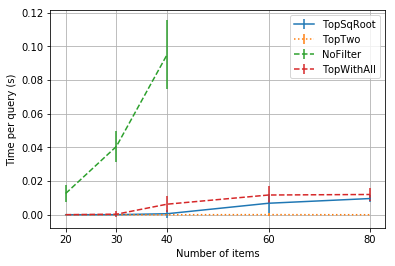

 Valr  Vals  TWA


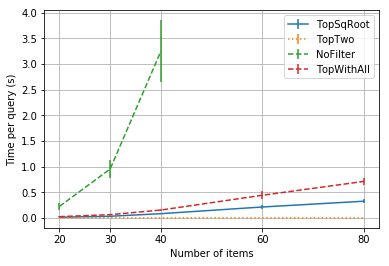

In [5]:
for recom in recommenders:
    for voi in vois:
        there_is_combination_of_filt_recom_voi = False
        fig = plt.figure(figsize=(6,4))
        ax = fig.subplots()
        for filt in filters:
            x_vals = []
            y_vals = []
            y_err = []
            for num in numerosities_with_filters:
                table = time[num]
                row = table[ (table['recommender'] == recom) & (table['filter'] == filt) & (table['selector'] == voi)]
                
                if not row.empty:
                    there_is_combination_of_filt_recom_voi = True
                    x_vals.append(num)
                    y_vals.append(row.iloc[0].average_time)
                    y_err.append(row.iloc[0].stddev_time)
                    
            if there_is_combination_of_filt_recom_voi:
                ax.errorbar(x_vals, y_vals,  yerr=y_err, label=filterName[filt.strip()], linestyle=filterStyle[filt.strip()])        
        
        if there_is_combination_of_filt_recom_voi:
            print(recom + " " + voi +" "+filt)
            ax.set(xlabel='Number of items', xticks=list(numerosities), ylabel='Time per query (s)')
            ax.grid()
            ax.legend()
            plt.show()
            title = "time_filters_"+recom+"_"+voi+".pdf"
            fig.savefig(title, pad_inches=0, bbox_inches='tight')

